# AE on STAGGER DATASET

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from skmultiflow.data import HyperplaneGenerator

import scipy.stats as stats

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import tensorflow
import tensorflow.keras.backend as K
import tensorflow.keras.layers as layers

import warnings
warnings.filterwarnings('ignore')

# STAGGER DATASET

In [49]:
columns=['size','color','shape','class']
size=['small','medium','large']
color=['red','green','Blue']
shape=['circular','non-circular','Rectangle']

In [50]:
data=pd.DataFrame(columns=columns)

In [51]:
for i in range(3000):
    s=np.random.choice(size)
    col=np.random.choice(color)
    sh=np.random.choice(shape)
    data.loc[i]=[s,col,sh,"NA"]

In [52]:
data.head()

,size,color,shape,class
0,small,Blue,Rectangle,NA
1,medium,Blue,non-circular,NA
2,small,green,circular,NA
3,medium,Blue,circular,NA
4,small,red,non-circular,NA


In [53]:
data.shape

(3000, 4)

In [54]:
for i in range(3000):
    if(data.loc[i,'color']=='red') & (data.loc[i,'size']=='small'):
        data.loc[i,'class']='p'  
    else:
        data.loc[i,'class']='n' 

In [55]:
data.head()

,size,color,shape,class
0,small,Blue,Rectangle,n
1,medium,Blue,non-circular,n
2,small,green,circular,n
3,medium,Blue,circular,n
4,small,red,non-circular,p


In [56]:
data['class'].value_counts()

n    2662
p     338
Name: class, dtype: int64

In [57]:
data.dtypes

size     object
color    object
shape    object
class    object
dtype: object

In [58]:
data['size'].value_counts()

medium    1004
large      998
small      998
Name: size, dtype: int64

## Data Preparation

In [59]:
 def encode_all(data,label_col):
        
    # Apply Label Encoding
    encoder=LabelEncoder()
    for col in data.columns:
        if ((data[col].dtype=='object')and (col!=label_col)): 
            data = pd.get_dummies(data, columns=[col])
            
   # Apply Minmax Normalization 
    for col in data.columns:
        if ((data[col].dtype=='float64')or(data[col].dtype=='int64')): 
            data[col] = np.round((data[col] - data[col].min()) / (data[col].max() - data[col].min()) ,3)  
        
    train=data[0:int(len(data)*0.80)]
    test=data[int((0.80*len(data))):len(data)]
    
    train_positives = train[train[label_col] == 'p']
    train_negatives = train[train[label_col] == 'n']
    
    X_positive=train_positives.drop([label_col],axis=1)
    X_negative=train_negatives.drop([label_col],axis=1)
    return train, test , data, X_positive,X_negative

In [60]:
 train, test , data, X_positive,X_negative=encode_all(data,'class')

In [61]:
train

,class,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
0,n,0,0,1,1,0,0,1,0,0
1,n,0,1,0,1,0,0,0,0,1
2,n,0,0,1,0,1,0,0,1,0
3,n,0,1,0,1,0,0,0,1,0
4,p,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2395,n,0,1,0,0,0,1,0,1,0
2396,n,0,1,0,1,0,0,0,0,1
2397,n,1,0,0,0,0,1,0,1,0
2398,p,0,0,1,0,0,1,0,0,1


In [62]:
X_positive

,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
4,0,0,1,0,0,1,0,0,1
13,0,0,1,0,0,1,0,1,0
23,0,0,1,0,0,1,0,1,0
64,0,0,1,0,0,1,0,0,1
65,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
2363,0,0,1,0,0,1,0,0,1
2369,0,0,1,0,0,1,1,0,0
2374,0,0,1,0,0,1,1,0,0
2384,0,0,1,0,0,1,0,0,1


In [63]:
X_negative

,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
0,0,0,1,1,0,0,1,0,0
1,0,1,0,1,0,0,0,0,1
2,0,0,1,0,1,0,0,1,0
3,0,1,0,1,0,0,0,1,0
5,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2394,0,1,0,0,1,0,0,0,1
2395,0,1,0,0,0,1,0,1,0
2396,0,1,0,1,0,0,0,0,1
2397,1,0,0,0,0,1,0,1,0


In [64]:
def autoencoder (train,epochs,val_set):
    
    # set bottleneck 1/3 of the input layer size
    encoding_dim = int(np.floor(train.shape[-1]/3))
    
    # input layer size= # of attributes in the dataset after one-hot encoding
    input_layer = tensorflow.keras.Input(shape=train.shape[1:]) # Input Layer
    
    encoded = layers.Dense(encoding_dim, activation='sigmoid')(input_layer) # Code Layer
    decoded = layers.Dense(train.shape[1], activation='sigmoid')(encoded) # Output Laye
       
    
    autoencoder = tensorflow.keras.Model(input_layer, decoded)
    # above model maps an input to its reconstruction 
    
    encoder = tensorflow.keras.Model(input_layer, encoded)
    # above model maps input to its encoded representation 
    
   
    encoded_input = tensorflow.keras.Input(shape=(encoding_dim,))# Encoded Input
    decoder_layer = autoencoder.layers[-1]# Retrieve last layer of autoencoder model defined above
    decoder = tensorflow.keras.Model(encoded_input, decoder_layer(encoded_input))# Decoder Model
          
    autoencoder.compile(optimizer='adam', loss='mse') # Train autoencoder 
    history=autoencoder.fit(train,train, 
                epochs=epochs,
                batch_size=32,
                shuffle=True,
                validation_data=(val_set, val_set)).history
    return  autoencoder , history

In [65]:
def train_encoders(X_Positive,X_Negative, epochs):
    
    X_Positive_train=X_Positive[0:int(len(X_Positive)*0.90)]
    X_Positive_test=X_Positive[int((0.90*len(X_Positive))):len(X_Positive)-1]
    
    X_Negative_train=X_Negative[0:int(len(X_Negative)*0.90)]
    X_Negative_test=X_Negative[int((0.90*len(X_Negative))):len(X_Negative)-1]

    print("Training Autoencoder on Positive Examples ")
    encoder_pos_class, history_positive_class=autoencoder(X_Positive_train,epochs,X_Positive_test)
    print("Training Autoencoder on Negative Examples ")
    encoder_neg_class,history_negative_class=autoencoder(X_Negative_train,epochs,X_Negative_test)
    
    return encoder_pos_class, history_positive_class ,encoder_neg_class,history_negative_class

In [66]:
encoder_pos_class, history_positive_class ,encoder_neg_class,history_negative_class=train_encoders(X_positive,X_negative,100)

Training Autoencoder on Positive Examples 
Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 0.2379 - val_loss: 0.2305
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2333 - val_loss: 0.2267
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2324 - val_loss: 0.2230
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2269 - val_loss: 0.2194
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2229 - val_loss: 0.2158
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2197 - val_loss: 0.2122
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.2137 - val_loss: 0.2087
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2121 - val_loss: 0.2052
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.2073 - val_loss: 0.2017
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.2046 - va

8/8 [==============================] - 0s 8ms/step - loss: 0.0857 - val_loss: 0.0846
Epoch 85/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0855 - val_loss: 0.0843
Epoch 86/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0852 - val_loss: 0.0841
Epoch 87/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0848 - val_loss: 0.0838
Epoch 88/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0846 - val_loss: 0.0836
Epoch 89/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0840 - val_loss: 0.0833
Epoch 90/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0842 - val_loss: 0.0831
Epoch 91/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0841 - val_loss: 0.0829
Epoch 92/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0837 - val_loss: 0.0827
Epoch 93/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0832 - val_loss: 0.0824
Epoch 94/100
8/8 [===============

60/60 [==============================] - 0s 3ms/step - loss: 0.1124 - val_loss: 0.1175
Epoch 67/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1108 - val_loss: 0.1168
Epoch 68/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1125 - val_loss: 0.1161
Epoch 69/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1111 - val_loss: 0.1155
Epoch 70/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1114 - val_loss: 0.1149
Epoch 71/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1098 - val_loss: 0.1143
Epoch 72/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1073 - val_loss: 0.1137
Epoch 73/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1075 - val_loss: 0.1132
Epoch 74/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1084 - val_loss: 0.1126
Epoch 75/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1048 - val_loss: 0.1121
Epoch 76/100


In [159]:
#Plot the model loss(train/test) for give number of epochs
def plot_loss(history):
    plt.plot(history['loss'], linewidth=2, label='Training_Loss')
    plt.plot(history['val_loss'], linewidth=2, label='Validation_Loss')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    #plt.ylim(ymin=0.70,ymax=1)
    plt.show()

In [67]:
def mse_predictions(test, encoder):
    #test=data[int((0.66*len(data))):len(data)-1]
    #pos_test, neg_test=encode(test)
    #Y_test=test['class']
    #X_test=test.drop(['class'],axis=1)
    test=np.array(test)
    predictions=[]
    for i in range(0, test.shape[0]):
        ROW = np.array([test[i]])
        pred= encoder.predict(ROW) 
        mse = np.mean(np.power(test[i] - pred, 2))
        predictions.append(mse)
        #print(test[i] ,pred,mse)
    return predictions

In [68]:
def plot_results(predictions):
    df=pd.DataFrame(predictions,columns=['MSE'])
    #df['class']=pd.Series(Y_test)
    df['MSE']=df['MSE'].round(2)
    #df_positive_class=df[df['class']==1]
    #df_negative_class=df[df['class']==0]
   
    mean=np.round(np.mean( df['MSE']),3)
    max=np.round(np.max( df['MSE']),3)
    min=np.round(np.min( df['MSE']),3)
    var=np.round(np.var( df['MSE']),3)
    
    
    f, axes = plt.subplots(1, 2,figsize=(16,4))
    f.suptitle('Boxplots and Normal Distribution plot for MSE Distribution')
    #axes[0, 0].set_title('MSE of Positive Class')
    sns.boxplot(x=df['MSE'], data=df, ax=axes[0])
    #axes[0, 1].set_title('MSE of Negative Class')    
    #sns.boxplot(x=df_negative_class['MSE'], data=df_negative_class  , ax=axes[1])
    sns.distplot(x=df['MSE'],  ax=axes[1])
    print('mean={} ,max={},min={},variance={}'.format(mean,max,min,var))
    
    fig, ax = plt.subplots(figsize=(16,5))
    ax.set_title('MSE plot ')
    plt.plot(df['MSE'],label="MSE")
    #plt.plot(df_positive_class['MSE'],label="MSE of Positive Class")
    plt.legend()
    plt.show()  
    #return df

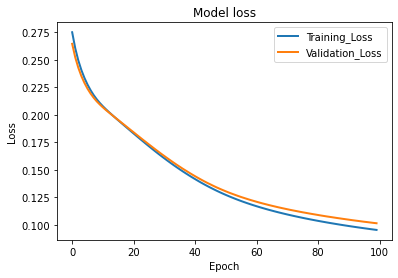

In [160]:
plot_loss(history_negative_class)

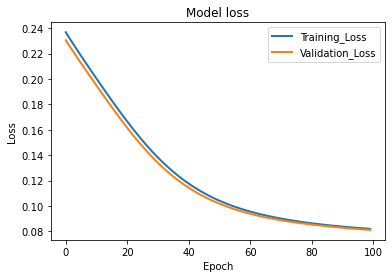

In [161]:
plot_loss(history_positive_class)

In [69]:
test_pos_class=test[test['class']=='p']
test_neg_class=test[test['class']=='n']

In [70]:
test_neg_class

,class,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
2400,n,0,0,1,1,0,0,1,0,0
2401,n,1,0,0,0,0,1,0,0,1
2402,n,0,1,0,0,0,1,1,0,0
2403,n,0,1,0,0,1,0,0,1,0
2404,n,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2993,n,1,0,0,0,1,0,0,0,1
2994,n,0,0,1,0,1,0,0,1,0
2996,n,0,1,0,0,1,0,0,0,1
2997,n,1,0,0,0,1,0,1,0,0


In [71]:
del test_pos_class['class']
del test_neg_class['class']

In [72]:
predictions_neg=mse_predictions(test_neg_class,encoder_neg_class)

mean=0.098 ,max=0.19,min=0.03,variance=0.002


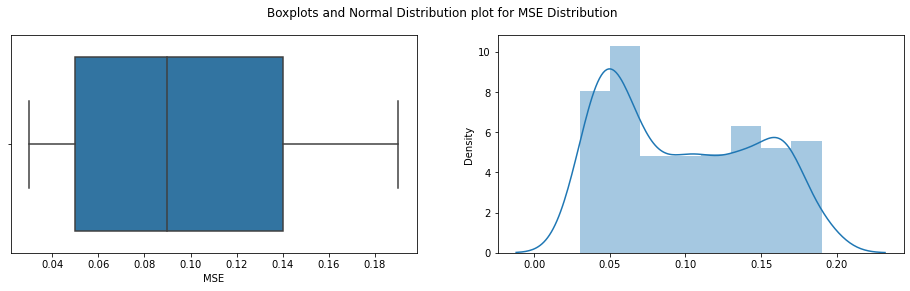

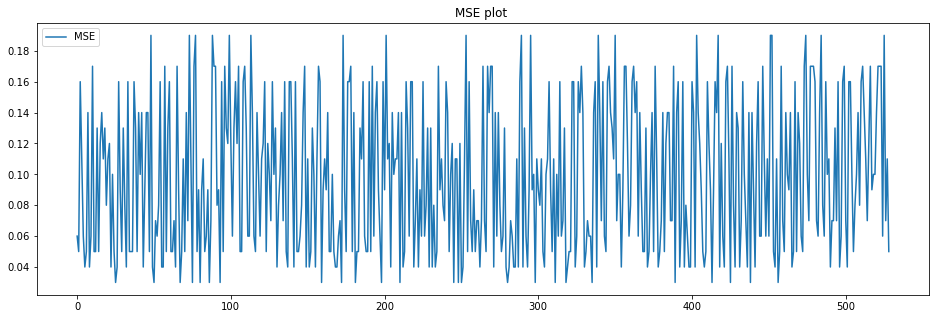

In [73]:
plot_results(predictions_neg)

In [74]:
a=23.00007877

In [75]:
np.round(a,2)

23.0

In [76]:
def make_batches(test_data):
    data=np.array(test_data)
    batch_size=32
    batches={}
    count=0
    for index in range(0,data.shape[0],batch_size):
        batches[count]=data[index:min(index+batch_size,data.shape[0]),:]
        count+=1
    return batches,batch_size
    #print(batch.shape) 

In [77]:
batches_neg,batch_size=make_batches(test_neg_class)

In [78]:
batches_neg;

In [79]:
# Anderson-Darling Test
def Anderson_Darling(data):
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [80]:
# D'Agostino and Pearson's Test
def D_Agostino(data):
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [81]:
# Shapiro-Wilk Test
def Shapiro_Wilk(data):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.10f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [82]:
def compute_instance_loss_batch_loss(batch,batch_size,encoder):
    mse_list=[]
    mse_sum=0  
    for i in range(0,batch.shape[0]):
        ROW = np.array([batch[i]])
        pred= encoder.predict(ROW) 
        mse = np.round(np.mean(np.power(batch[i] - pred, 2)),5)
        mse_list.append(mse)
        mse_sum+=mse
    avg_mse=mse_sum/batch_size
    return mse_list,avg_mse   
    

In [83]:
def check_all_batch_normality(batches,encoder,batch_size):
    batch_avg_mse=[]
    batch_mse_values={}
    for b in batches:
        print("\n ********************")
        print('Batch: {}'.format(b))
        mse_list,average_mse=compute_instance_loss_batch_loss(batches[b],batch_size,encoder)
        plot_results(mse_list)
        
        print("\nShapiro_Wilk Test")
        #Shapiro_Wilk(mse_list)
       # print("D_Agostino Test")
       # D_Agostino(mse_list)
        print("\nAnderson_Darling Test")
        #Anderson_Darling(mse_list)
        batch_avg_mse.append(average_mse)
        batch_mse_values[b]=mse_list
    return batch_avg_mse,batch_mse_values


 ********************
Batch: 0
mean=0.088 ,max=0.17,min=0.03,variance=0.002


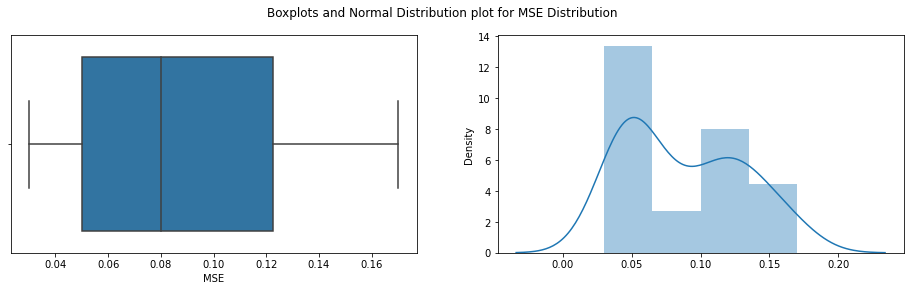

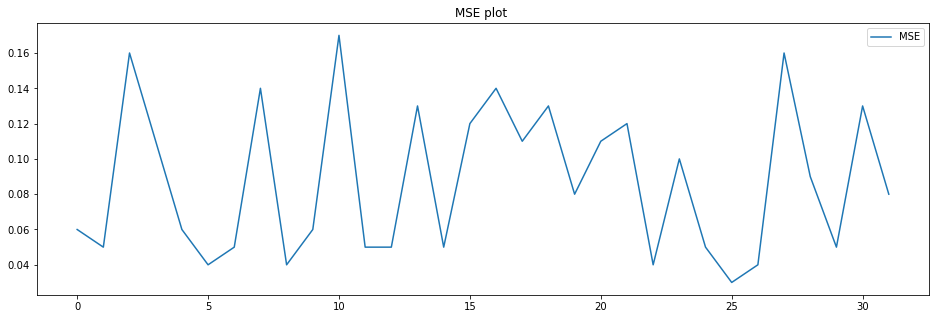


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 1
mean=0.091 ,max=0.19,min=0.03,variance=0.002


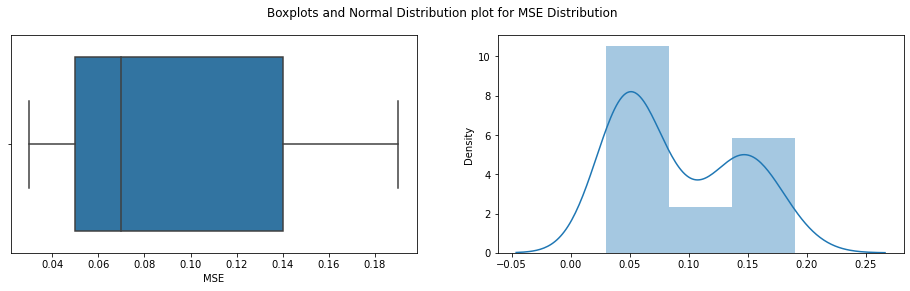

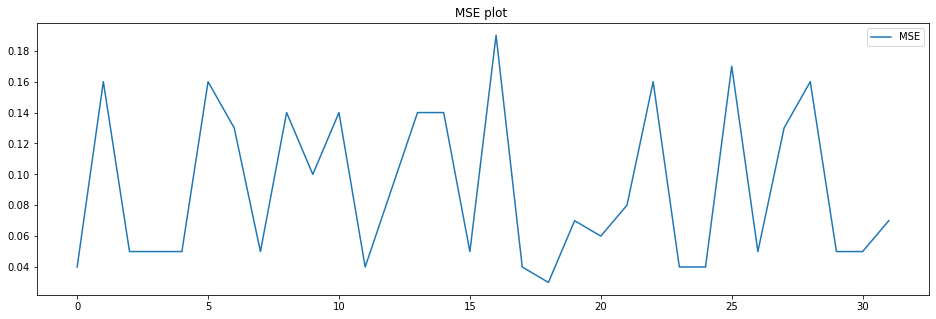


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 2
mean=0.095 ,max=0.19,min=0.03,variance=0.003


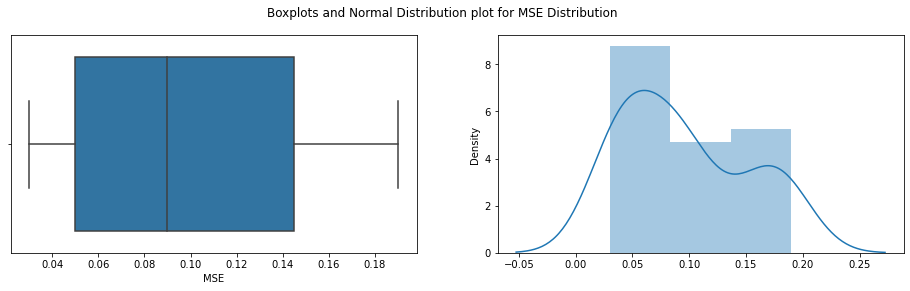

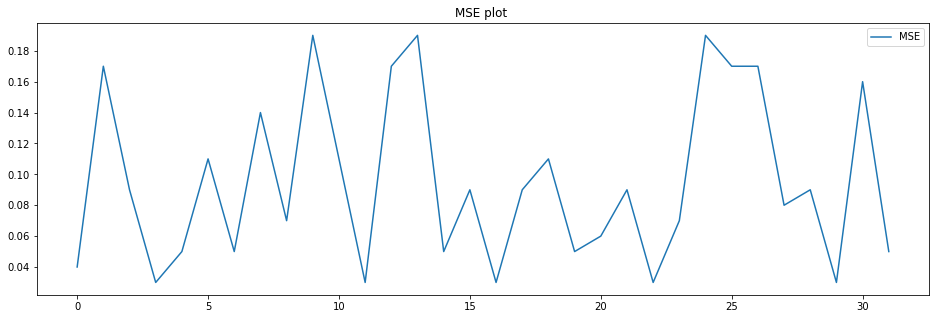


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 3
mean=0.115 ,max=0.19,min=0.05,variance=0.002


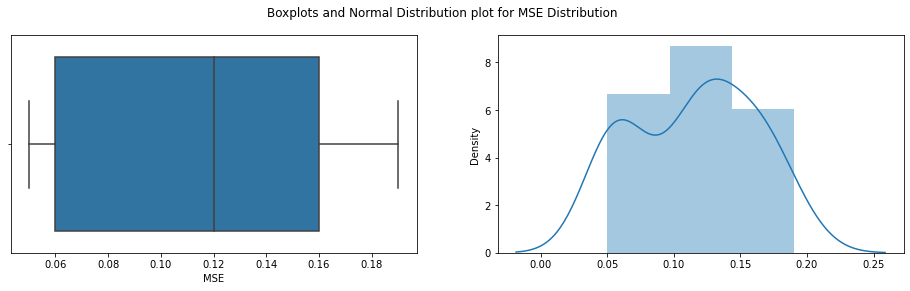

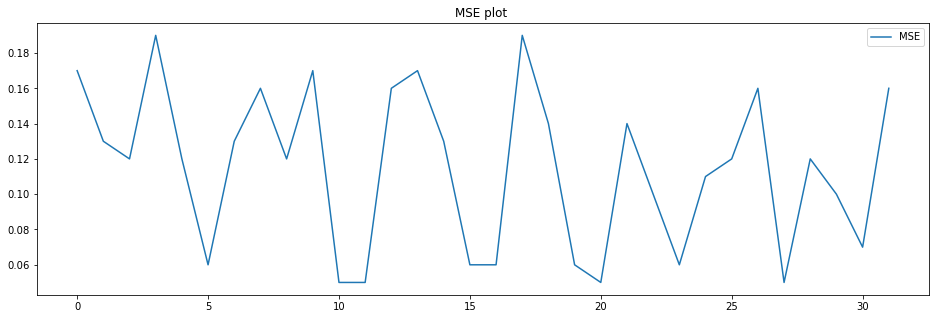


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 4
mean=0.096 ,max=0.17,min=0.03,variance=0.002


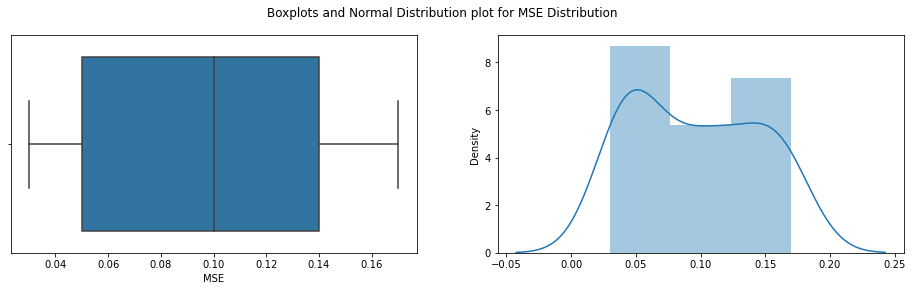

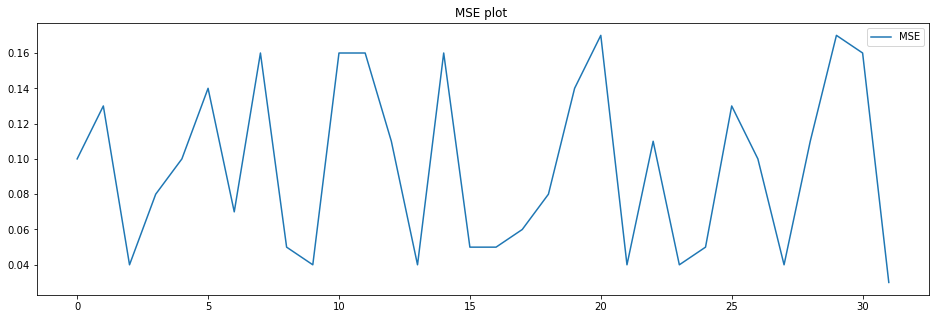


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 5
mean=0.088 ,max=0.19,min=0.03,variance=0.002


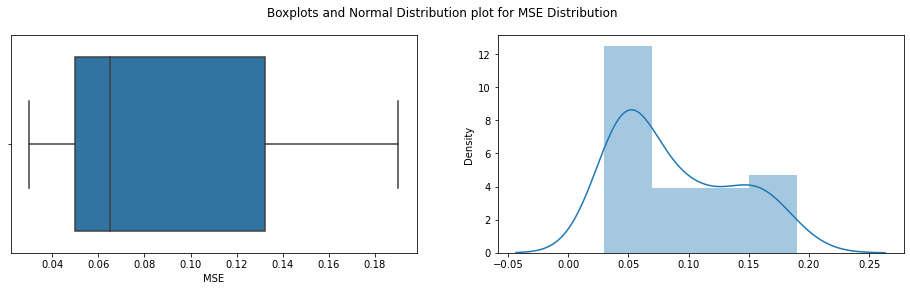

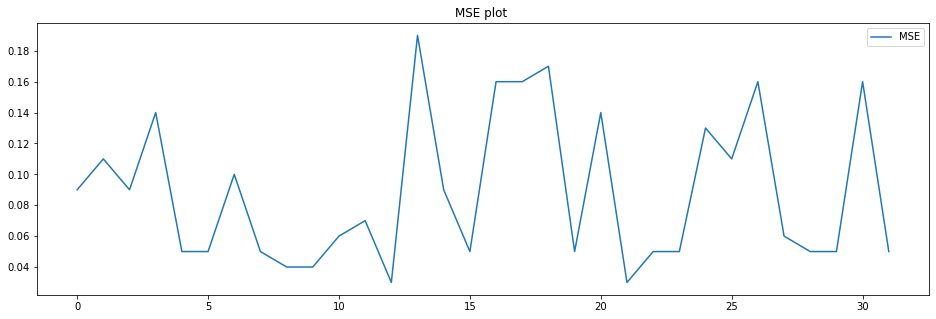


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 6
mean=0.103 ,max=0.19,min=0.03,variance=0.002


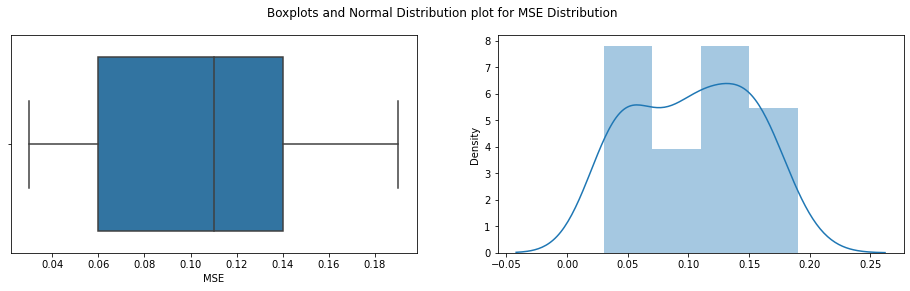

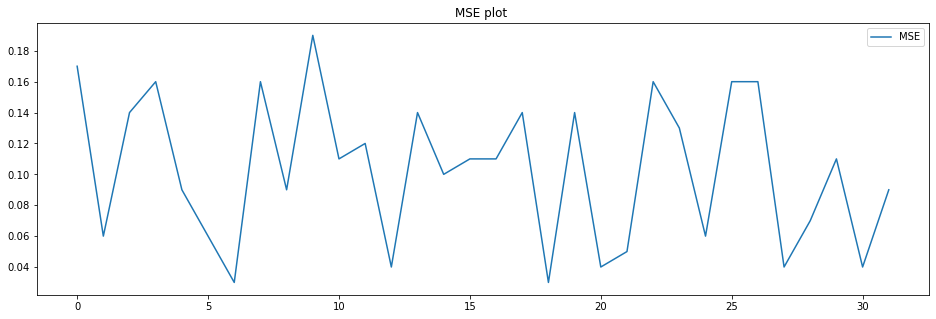


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 7
mean=0.092 ,max=0.19,min=0.03,variance=0.002


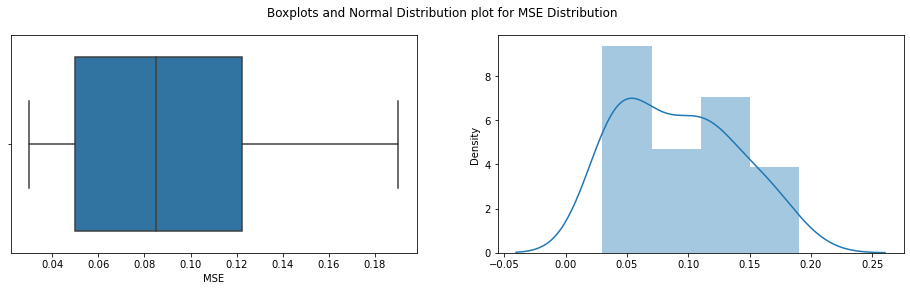

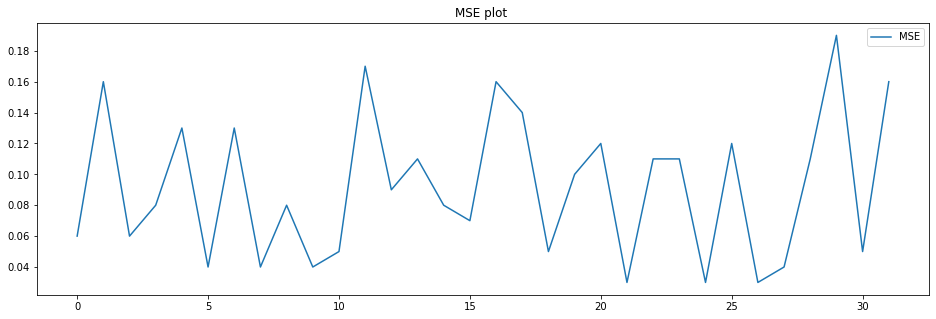


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 8
mean=0.082 ,max=0.17,min=0.03,variance=0.002


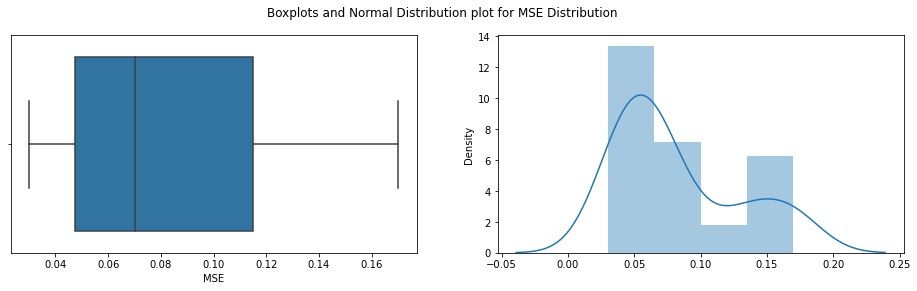

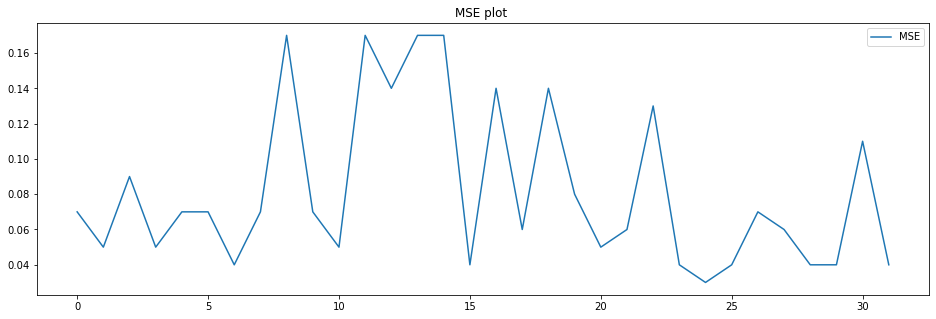


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 9
mean=0.091 ,max=0.19,min=0.03,variance=0.002


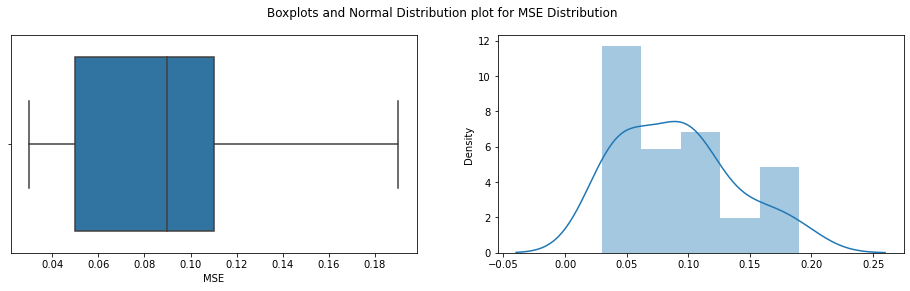

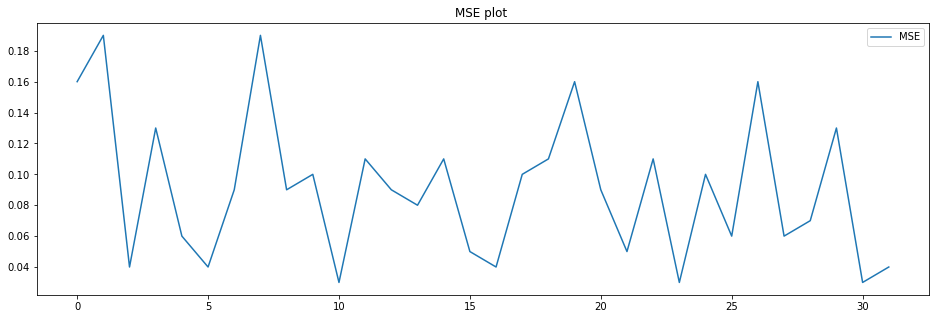


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 10
mean=0.107 ,max=0.19,min=0.03,variance=0.003


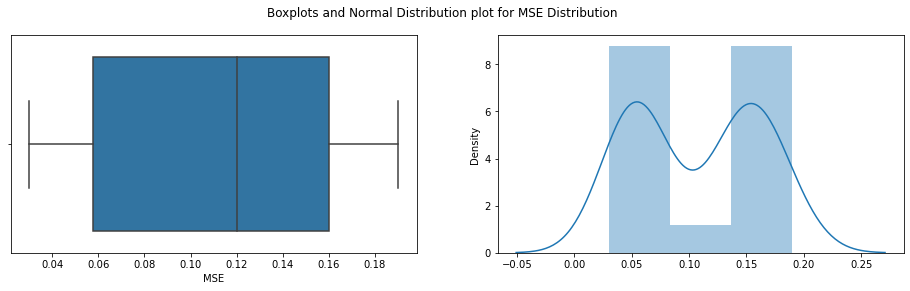

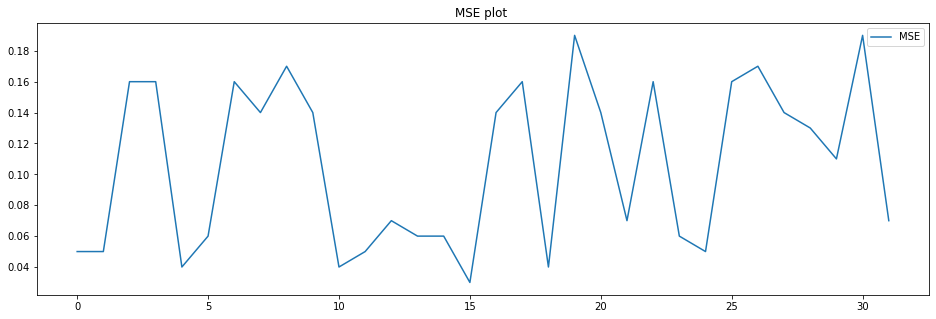


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 11
mean=0.1 ,max=0.17,min=0.04,variance=0.002


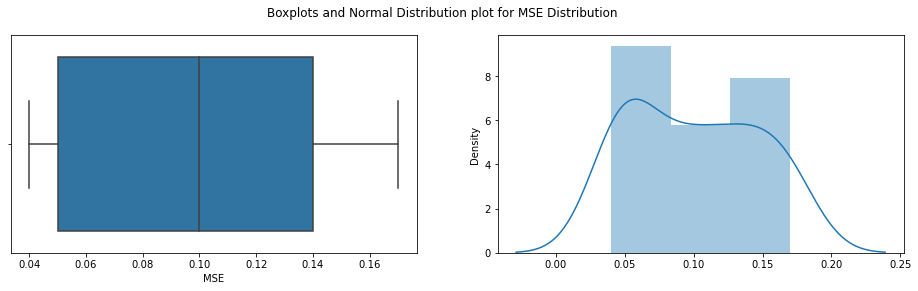

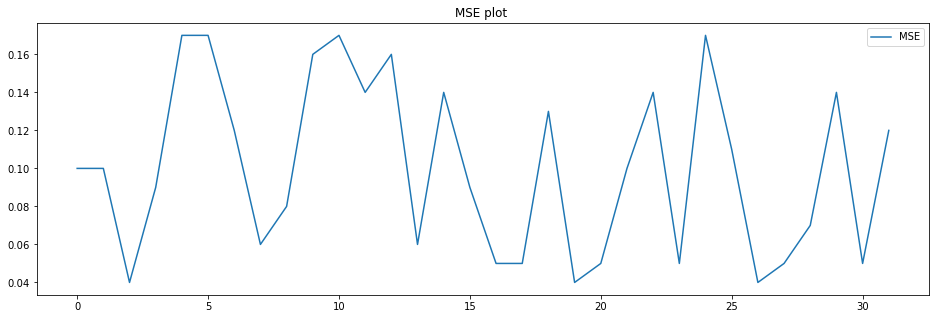


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 12
mean=0.098 ,max=0.19,min=0.03,variance=0.003


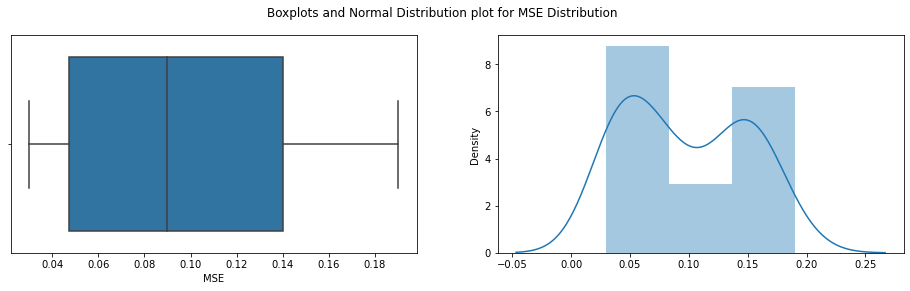

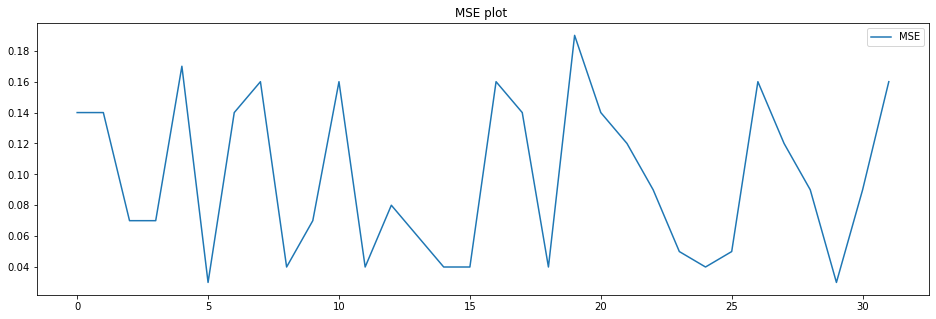


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 13
mean=0.101 ,max=0.19,min=0.03,variance=0.003


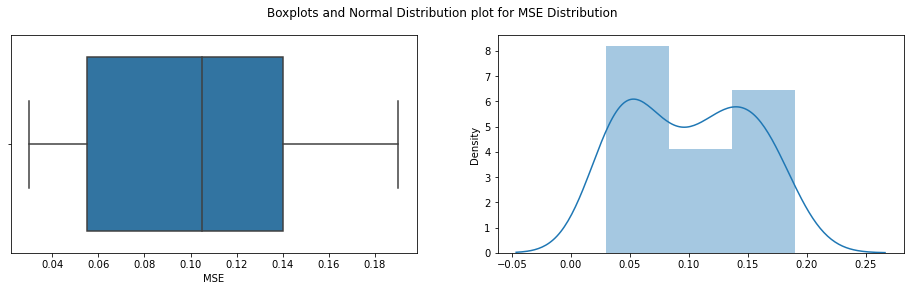

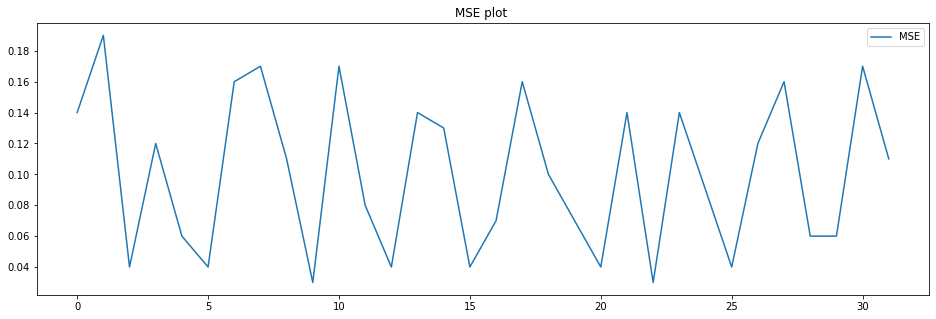


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 14
mean=0.105 ,max=0.19,min=0.03,variance=0.003


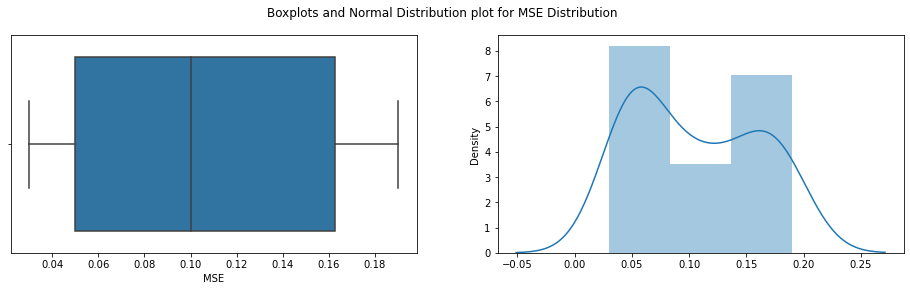

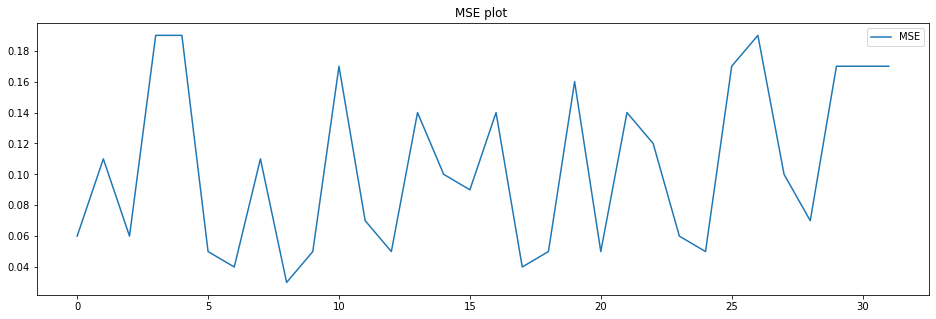


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 15
mean=0.107 ,max=0.19,min=0.04,variance=0.002


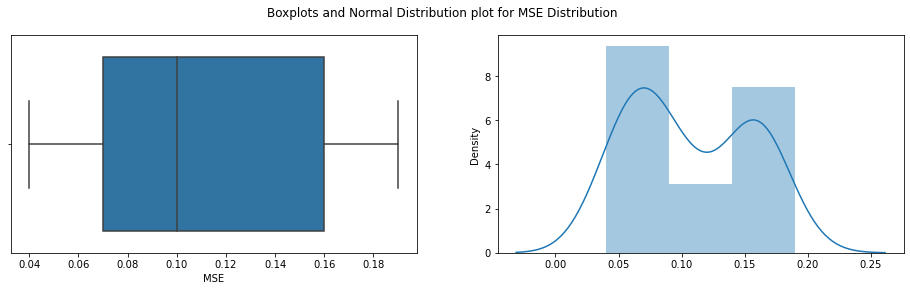

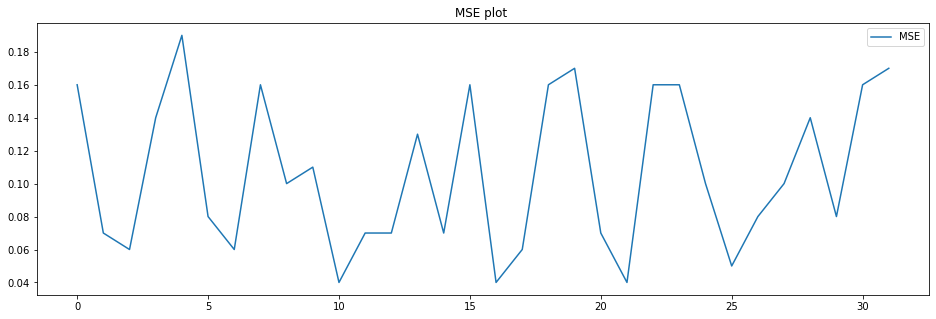


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 16
mean=0.119 ,max=0.19,min=0.05,variance=0.002


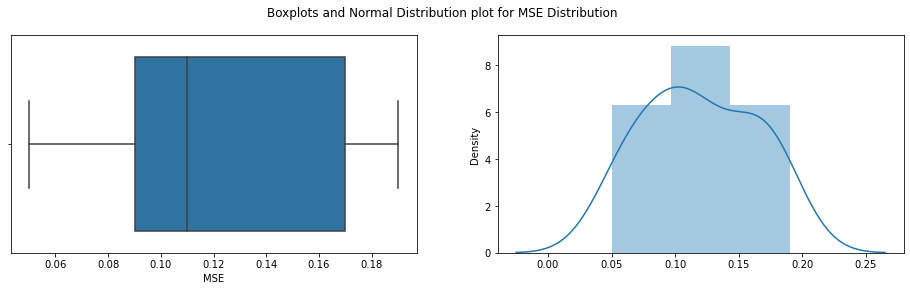

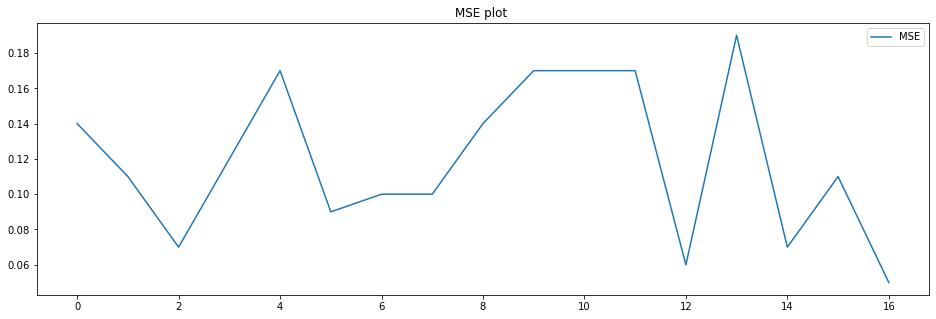


Shapiro_Wilk Test

Anderson_Darling Test


In [84]:
batch_avg_mse_neg_en_neg,batch_mse_values_neg_en_neg=check_all_batch_normality(batches_neg,encoder_neg_class,32)

BATCH MSE distribution is not following the normal distribution . So  Z-Score and IQR thresholds cannot be reliable in this case.

In [85]:
## computes loss threshold uisng IQR as well as ZScore from first test batch 
def compute_loss_threshold_testdata(threshold_batch):
    #val_loss=history['val_loss']
    ## Quartile Method 
    Q1=np.quantile(threshold_batch,0.25)
    Q3=np.quantile(threshold_batch,0.75)
    IQR=Q3-Q1
    thres_iqr=(Q3+1.5*IQR).round(4)
    #Z_SCORE
    mean=np.mean(threshold_batch)
    sigma=np.std(threshold_batch)
    thres_zscore=(mean+3*sigma).round(4)
    
    return thres_iqr ,thres_zscore

In [86]:
## computes loss threshold uisng IQR as well as ZScore from first test batch 
def compute_batch_threshold_testdata(batch_avg_mse):
    #val_loss=history['val_loss']
    ## Quartile Method 
    Q1=np.quantile(batch_avg_mse,0.25)
    Q3=np.quantile(batch_avg_mse,0.75)
    IQR=Q3-Q1
    thres_iqr=(Q3 + 1.5*IQR).round(4)
    #Z_SCORE
    mean=np.mean(batch_avg_mse)
    sigma=np.std(batch_avg_mse)
    thres_zscore=(mean+3*sigma).round(4)
    thresh_max=np.round((np.max(batch_avg_mse)),3)
    return thres_iqr, thres_zscore ,thresh_max

In [87]:
def compute_instance_threshold_firstN_batches(batch_avg_mse_values,N):
    zscore_list=[]
    #value_list=[]
    for k in range(0,N):
        value_list=batch_avg_mse_values[k]
         #Z_SCORE
        mean=np.mean(value_list)
        sigma=np.std(value_list)
        thres_zscore=(mean+3*sigma).round(4)
        zscore_list.append(thres_zscore)
        #print (value_list)
        #print(zscore_list)
    return (np.mean(zscore_list).round(4)) , zscore_list   

In [88]:
instance_thresh_neg,zscore_list_neg=compute_instance_threshold_firstN_batches(batch_mse_values_neg_en_neg,10)

In [89]:
instance_thresh_neg

0.2339

In [90]:
zscore_list_neg

[0.2098,
 0.2381,
 0.2573,
 0.2486,
 0.2382,
 0.2337,
 0.2442,
 0.2286,
 0.2129,
 0.2274]

In [91]:
thres_iqr_batch_neg, thres_zscore_batch_neg ,thresh_max_batch_neg=compute_batch_threshold_testdata(batch_avg_mse_neg_en_neg)

In [92]:
thres_iqr_batch_neg, thres_zscore_batch_neg ,thresh_max_batch_neg

(0.1213, 0.1296, 0.115)

In [93]:
def threshold_exceed_count(batch_mse_values, thr):
    exceed_count={}
    for key in batch_mse_values.keys():
        count=0
        list=batch_mse_values[key]
        for a in range(0,len(list)):
            if list[a]>thr:
                count+=1
        exceed_count[key]=count 
    values = exceed_count.values()
    total = sum(values)
    return exceed_count,total

In [94]:
# Counts the MSE values exceeding threshold in each batch 
exceed_count_neg_en_neg,total_neg_en_neg=threshold_exceed_count(batch_mse_values_neg_en_neg,instance_thresh_neg)

In [95]:
exceed_list_neg_en_neg=[]
for key in exceed_count_neg_en_neg.keys():
    exceed_list_neg_en_neg.append(exceed_count_neg_en_neg[key])

mean=0.0 ,max=0,min=0,variance=0.0


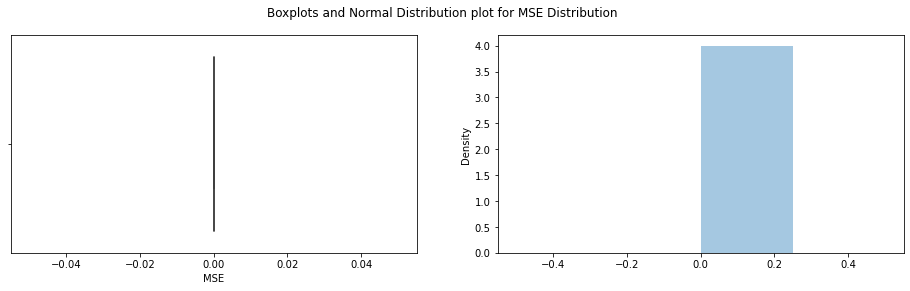

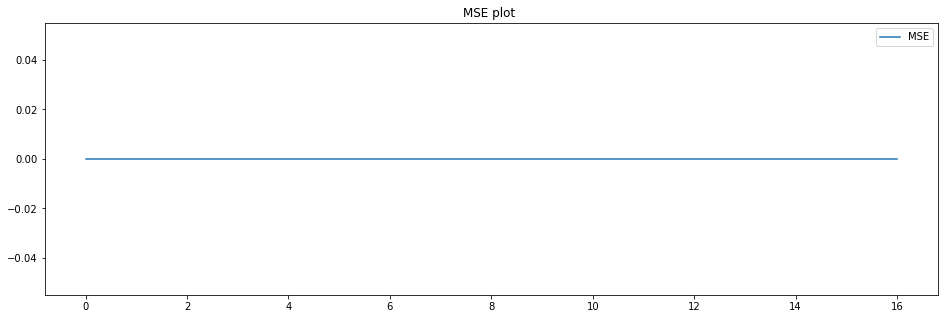

In [96]:
plot_results(exceed_list_neg_en_neg)

In [97]:
count_thresh_neg=np.max(exceed_list_neg_en_neg)

In [98]:
count_thresh_neg

0

# Positive Autoencoder

In [99]:
predictions_pos=mse_predictions(test_pos_class,encoder_pos_class)

mean=0.084 ,max=0.09,min=0.08,variance=0.0


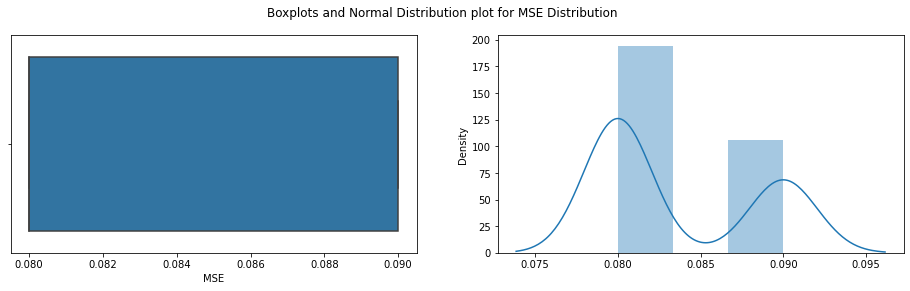

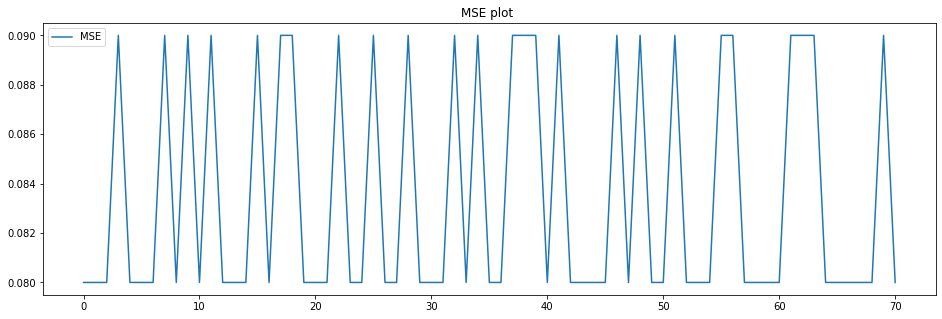

In [100]:
plot_results(predictions_pos)

In [101]:
batches_pos, batch_size=make_batches(test_pos_class)


 ********************
Batch: 0
mean=0.083 ,max=0.09,min=0.08,variance=0.0


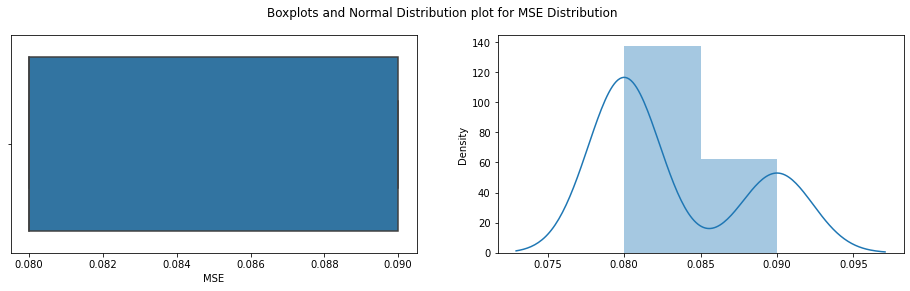

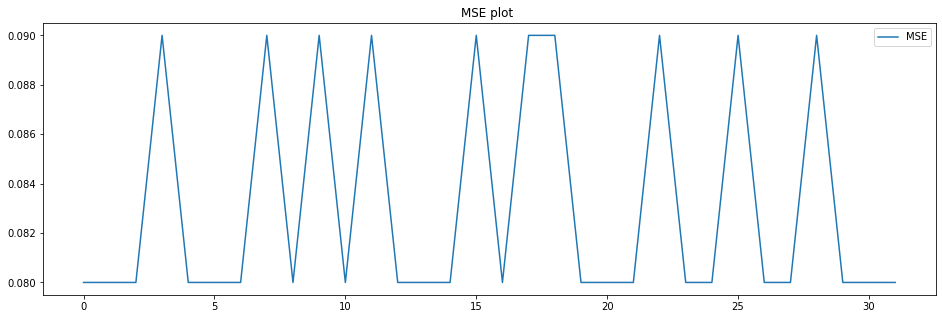


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 1
mean=0.084 ,max=0.09,min=0.08,variance=0.0


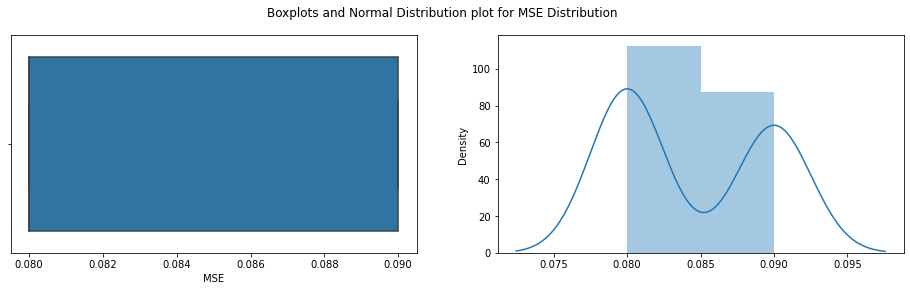

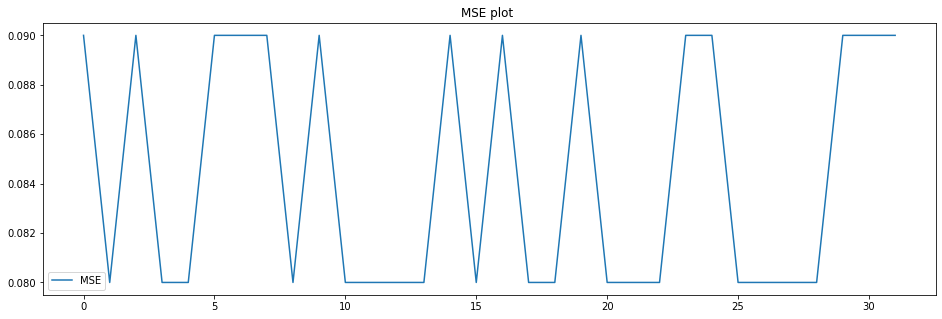


Shapiro_Wilk Test

Anderson_Darling Test

 ********************
Batch: 2
mean=0.081 ,max=0.09,min=0.08,variance=0.0


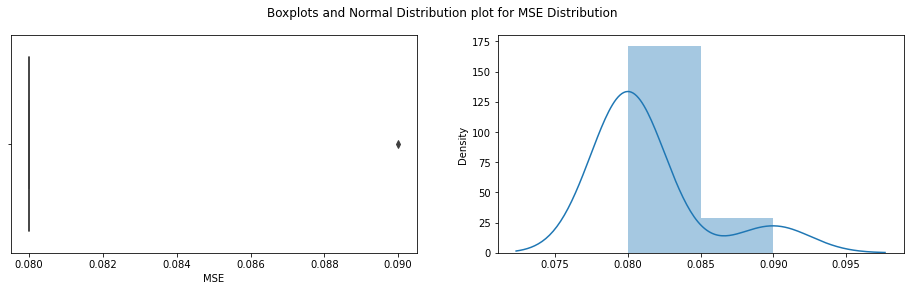

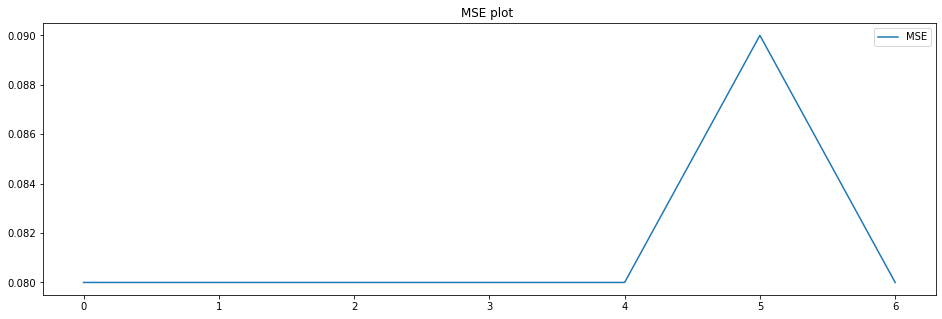


Shapiro_Wilk Test

Anderson_Darling Test


In [102]:
batch_avg_mse_pos,batch_mse_values_pos=check_all_batch_normality(batches_pos,encoder_pos_class,32)

In [103]:
instance_thresh_pos,zscore_list_pos=compute_instance_threshold_firstN_batches(batch_mse_values_pos,2)

In [104]:
batch_avg_mse_pos

[0.08193999878130853, 0.08301999908871949, 0.01764812460169196]

In [105]:
instance_thresh_pos

0.095

In [106]:
thres_iqr_batch_pos, thres_zscore_batch_pos ,thresh_max_batch_pos=compute_batch_threshold_testdata(batch_avg_mse_pos)

In [107]:
thres_iqr_batch_pos, thres_zscore_batch_pos ,thresh_max_batch_pos

(0.1315, 0.1526, 0.083)

In [108]:
# Counts the MSE values exceeding threshold in each batch 
exceed_count_pos,total_pos=threshold_exceed_count(batch_mse_values_pos,instance_thresh_pos)

In [109]:
exceed_list_pos=[]
for key in exceed_count_pos.keys():
    exceed_list_pos.append(exceed_count_pos[key])

mean=0.0 ,max=0,min=0,variance=0.0


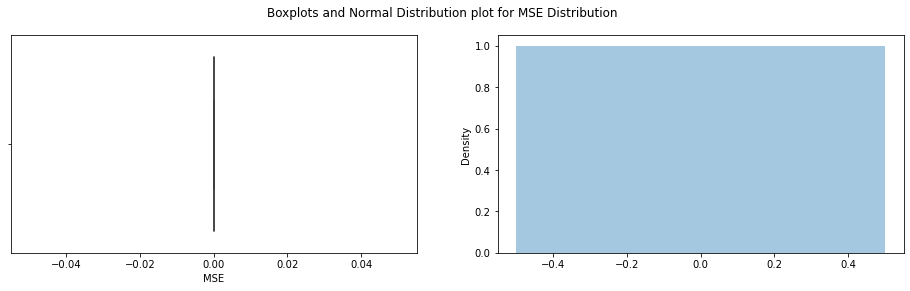

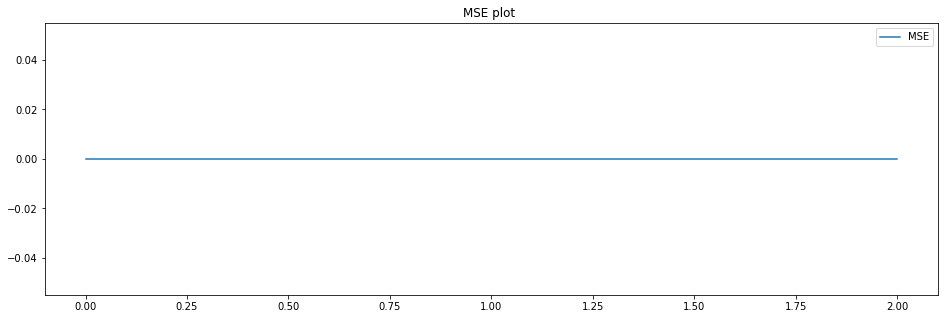

In [110]:
plot_results(exceed_list_pos)

In [111]:
count_thresh_pos=np.max(exceed_list_pos)

In [112]:
count_thresh_pos

0

# Working with Drifted Datset 

Generate two Straems : A Normal Stream of 30 Batches generated with the same procedures as trained /test data 

In [113]:
columns=['size','color','shape','class']
size=['small','medium','large']
color=['red','green','Blue']
shape=['circular','non-circular','Rectangle']

In [114]:
df1=pd.DataFrame(columns=columns)

In [115]:
for i in range(1920): # 60 batches of size 32
    s=np.random.choice(size)
    col=np.random.choice(color)
    sh=np.random.choice(shape)
    df1.loc[i]=[s,col,sh,"NA"]

In [116]:
df1[(df1['size']=='small') & (df1['color']=='red')] .count()


size     223
color    223
shape    223
class    223
dtype: int64

In [117]:
for i in range(1920):
    if(df1.loc[i,'color']=='green') | (df1.loc[i,'shape']=='circular'):
        df1.loc[i,'class']='p'  
    else:
        df1.loc[i,'class']='n' 

In [118]:
drifted_data=df1

In [119]:
drifted_data

,size,color,shape,class
0,small,green,circular,p
1,small,red,circular,p
2,large,green,non-circular,p
3,medium,green,Rectangle,p
4,large,green,non-circular,p
...,...,...,...,...
1915,medium,Blue,non-circular,n
1916,large,Blue,non-circular,n
1917,small,Blue,Rectangle,n
1918,small,red,Rectangle,n


In [120]:
def encode_test_data(data,label_col):
        
    # Apply Label Encoding
    encoder=LabelEncoder()
    for col in data.columns:
        if ((data[col].dtype=='object')and (col!=label_col)): 
            data = pd.get_dummies(data, columns=[col])
            
   # Apply Minmax Normalization 
    for col in data.columns:
        if ((data[col].dtype=='float64')or(data[col].dtype=='int64')): 
            data[col] = np.round((data[col] - data[col].min()) / (data[col].max() - data[col].min()) ,3)  
    return data

In [121]:
drifted_data_tr=encode_test_data(drifted_data,'class')

In [122]:
drifted_data_tr

,class,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
0,p,0,0,1,0,1,0,0,1,0
1,p,0,0,1,0,0,1,0,1,0
2,p,1,0,0,0,1,0,0,0,1
3,p,0,1,0,0,1,0,1,0,0
4,p,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1915,n,0,1,0,1,0,0,0,0,1
1916,n,1,0,0,1,0,0,0,0,1
1917,n,0,0,1,1,0,0,1,0,0
1918,n,0,0,1,0,0,1,1,0,0


In [123]:
del drifted_data_tr['class']

In [124]:
drifted_data_tr

,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1915,0,1,0,1,0,0,0,0,1
1916,1,0,0,1,0,0,0,0,1
1917,0,0,1,1,0,0,1,0,0
1918,0,0,1,0,0,1,1,0,0


In [125]:
batches_d, batch_size=make_batches(drifted_data_tr)

In [126]:
def detect_at_batch_level(test_batch,b,batch_thres_pos,batch_thres_neg,count_thresh_pos,count_thres_neg,instance_thresh_pos,instance_thresh_neg, all_excede_list):
    
    # Layer 1 Variables 
    mse_list_layer1=[]     # Holds the MSE values predicted by Layer 1 Autoencoder for a single batch
    exceed_count_layer1=0  # How many instances exceed layer one instance level threshold
    mse_sum=0              # sum of MSE values from layer 1 AE for this batch
    #batch_mse_layer1=[]
    
    
    # Layer 2 Variables 
    mse_list_layer2=[]      # Holds the MSE values predicted by Layer 2 Autoencoder for a single batch
    exceed_count_layer2=-1  # If a batch is not passed to the layer2 AE , then exceed count value will be -1 . This is symbolic.
    mse_sum_layer2=0        # sum of MSE values from layer 2 AE for this batch
    
        
    layer1_excede_list=[] # Hold the batch numbers of bathces exceeding layer thresholds
    #all_excede_list=[]    # Hold the batch number of batches exceeding both Layer-1 and Layer-2 AE Thresholds 
    layer_one_instance_exceed_list=[] # Holds the indices of instances exceeding layer 1 instance threshold
    layer_two_instance_exceed_list=[] # Holds the indices of instances exceeding layer 2 instance thresholds
     
      
    # Determine Layer 1 and Layer AE and their associated thresholds
    layer_one_batch_thres= batch_thres_pos if batch_thres_pos<batch_thres_neg  else batch_thres_neg
    layer_two_batch_thres= batch_thres_pos if batch_thres_pos>batch_thres_neg  else batch_thres_neg
    layer_one_encoder= encoder_pos_class if batch_thres_pos<batch_thres_neg else encoder_neg_class
    layer_two_encoder= encoder_pos_class if batch_thres_pos>batch_thres_neg else encoder_neg_class
    
    layer_one_count_threshold=count_thresh_pos if batch_thres_pos<batch_thres_neg  else count_thres_neg
    layer_two_count_threshold=count_thresh_pos if batch_thres_pos>batch_thres_neg  else count_thres_neg
    
    layer1_ins_thresh=instance_thresh_pos if  batch_thres_pos<batch_thres_neg  else instance_thresh_neg
    layer2_ins_thresh=instance_thresh_pos if  batch_thres_pos>batch_thres_neg  else instance_thresh_neg
    
    # Pass each instance of a batch from Layer 1 AE. Compute Batch MSE and Number of Instances excceding Layer 1 Instance Thresh       
    
    avg_mse_layer1=0
    for i in range(0,test_batch.shape[0]):
        ROW = np.array([test_batch[i]])
        pred= layer_one_encoder.predict(ROW) 
        mse = np.round(np.mean(np.power(test_batch[i] - pred, 2)),5)
        mse_list_layer1.append(mse)
        if mse>layer1_ins_thresh:
            exceed_count_layer1+=1
            layer_one_instance_exceed_list.append(i)
        mse_sum+=mse    
    avg_mse_layer1=(mse_sum)/len(test_batch)
    avg_mse_layer2=0 
    # Check if This batch exceeds both Layer 1 batch and count thresholds
    if ((avg_mse_layer1>layer_one_batch_thres) and ( exceed_count_layer1 >layer_one_count_threshold) ):
        layer1_excede_list.append(b)# Keep track of batches exceesding layer 1 thresholds
        exceed_count_layer2=0
        # Pass each instance of this batch to Layer 2 AE. Compute Batch MSE and Number of Instances excceding Layer 2 Instance Thresh
        for i in range(0,test_batch.shape[0]):
            ROW = np.array([test_batch[i]])
            pred= layer_two_encoder.predict(ROW) 
            mse = np.round(np.mean(np.power(test_batch[i] - pred, 2)),5)
            mse_list_layer2.append(mse)
            if mse>layer2_ins_thresh:
                exceed_count_layer2+=1
                layer_two_instance_exceed_list.append(i)
            mse_sum_layer2+=mse    
        avg_mse_layer2=(mse_sum_layer2)/len(test_batch)
        
        if  (avg_mse_layer2 > layer_two_batch_thres) and (exceed_count_layer2>layer_two_count_threshold):
            all_excede_list.append(b)# Keep track of batches exceesding layer 2 thresholds
          
    return  all_excede_list,mse_list_layer1 , exceed_count_layer1 ,avg_mse_layer2,exceed_count_layer2,len(layer_two_instance_exceed_list),layer_two_batch_thres,layer_two_count_threshold,layer_one_instance_exceed_list,layer_two_instance_exceed_list,avg_mse_layer1 

In [127]:
# This function makes a list of dictionary values
def return_list_of_dict_values(d):
    values_list=[]
    for key in d.keys():
        values_list.append(d[key])
    return values_list

In [128]:
# This function takes two lists of Batch MSE and Exceed Counts along with Batch and Count Thresholds of Layer 2 AE
# If three consecutive bathces exceed booth thresholds , warning is generated and for 10 consectutive batches drift is confirmed.
def detect_drift(batch_mse,exceed_list, Thresh,count_thresh):
    n=0 # total number of batches where MSE exceeds threshold
    count=0 ## counts the number of consecutive batches exceding threshold
    w_count=0 # Count of elements in Window. Windows contains batch number where batch MSE exceeds
              #threshold 
    w_index_list=[] # Contains indices of batches where batch MSE esceeds threshold 
    for i in range(0,len(batch_mse)):
        #print (batch_mse)
        if(((batch_mse[i])>Thresh) and (exceed_list[i]>count_thresh)):
            print(' Threshold exceeds at batch : {}'.format(i))
            n=n+1
            print('Cumulative Batch Count Exceeding Threshold : {}'.format(n))
            if(len(w_index_list)==0 or (i-w_index_list[-1]==1)):
                # Check if w_index_list is empty or its last entry is the previous batch
                    w_index_list.append(i)# then append this batch to w_index_list
            count+=1
            #if (i!= w_index_list[-1]
            #print ("Batch %d MSE exceeds Threshold" %i)
            print(w_index_list)
            if (count>9):# if for more than nine consecutive batches , batch MSE esceeds threshold , then 
                         # confirm drift
                drift_batch=i-9 # at the first batch i this window

                print( " Drift Confirmed at Batch No : % d" %drift_batch)
        
        
        if(batch_mse[i])<Thresh:
            count=0 # reset count 
            if len(w_index_list)>=3:
                w_level=i-len(w_index_list)
                print("Warning Level at Batch",w_level)
            if len(w_index_list)<=10:
                w_index_list=[]
        
   

In [129]:
def detect_stream_drift(batches,encoder_pos_class,encoder_neg_class,batch_thres_pos,batch_thres_neg, count_thresh_pos,count_thres_neg):
    exceed_count_layer2_instance_thresh={} # Holds Number of instances exceeding thresholds of Both Layer 1 and layer 2 AE.
    
    mse_dict_L1={}         # Holds batchwise MSE values from Layer 1 AE
    exceed_count_L1={}     # Batchwise number of Instances exceeding layer 1 count threshold
    layer_one_instance_exceed_list={} # batch wise list of instances ( indices ) exceeding Layer 1 count threshold
    avg_mse_l1={}
    
    mse_dict_L2={}        # Holds batchwise MSE values from Layer 2 AE
    exceed_count_L2={}    # Batchwise number of Instances exceeding layer 2 count threshold
    layer_two_instance_exceed_list={} # For each batch maintains the indices where MSE exceeds layer 2 threshold
    avg_mse_l2={}         #
    all_excede_list=[]
    n=0
    for b in batches:
        print("\n\n")
        print("**************")
        print('\nBatch Number : {}'.format(b))
        all_excede_list,mse_dict_L1[b],exceed_count_L1[b],avg_mse_l2[b],exceed_count_L2[b],exceed_count_layer2_instance_thresh[b],layer_two_batch_thres,layer_two_count_threshold,layer_one_instance_exceed_list[b],layer_two_instance_exceed_list[b],avg_mse_l1[b]= detect_at_batch_level(batches[b],b,batch_thres_pos,batch_thres_neg,count_thresh_pos,count_thres_neg,instance_thresh_pos,instance_thresh_neg, all_excede_list)
             
        
        print('\nData Points Exceeding Layer 1 Encoder Instance Threshold : {} '.format(layer_one_instance_exceed_list[b]))
        print('\nData Points Exceeding Layer 2 Encoder Instance Threshold: {}'.format(layer_two_instance_exceed_list[b])) 
        print('\nNumber of Data Points Exceeding Layer 2 Encoder Instance thresholds: {}'.format(exceed_count_layer2_instance_thresh[b]))
        
    mse_list_layer1=return_list_of_dict_values(avg_mse_l1)
    exceed_count_list_layer1=return_list_of_dict_values(exceed_count_L1)
    
    
    ## Detect Drift at Batch Level 
    print ("\n Drift Detection at Batch Level\n")
    exceed_list=return_list_of_dict_values(exceed_count_L2)
    mse_list=return_list_of_dict_values(avg_mse_l2)
    detect_drift(mse_list,exceed_list,layer_two_batch_thres,layer_two_count_threshold )
        
    return all_excede_list,exceed_count_layer2_instance_thresh ,exceed_count_L2,avg_mse_l2 ,mse_list_layer1,exceed_count_list_layer1




In [130]:
all_excede_list_drifted,exceed_count_L2_instThresh_drifted ,exceed_count_L2_countThresh_drifted,avg_mse_l2_list_drifted,mse_list_layer1_drifted,exceed_count_list_layer1_drifted=detect_stream_drift(batches_d,encoder_pos_class,encoder_neg_class,thres_zscore_batch_pos,thres_zscore_batch_neg, count_thresh_pos,count_thresh_neg)




**************

Batch Number : 0

Data Points Exceeding Layer 1 Encoder Instance Threshold : [1, 9, 11, 18, 20, 28] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: [0, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31]

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 26



**************

Batch Number : 1

Data Points Exceeding Layer 1 Encoder Instance Threshold : [0, 1, 4, 8, 14] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 2

Data Points Exceeding Layer 1 Encoder Instance Threshold : [0, 3, 8, 25, 27] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: [1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31]

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 27



**************

Batch Number : 3

Data Points Excee


Data Points Exceeding Layer 1 Encoder Instance Threshold : [3, 21, 28, 31] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 32

Data Points Exceeding Layer 1 Encoder Instance Threshold : [12, 30] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 33

Data Points Exceeding Layer 1 Encoder Instance Threshold : [0, 4, 22] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 34

Data Points Exceeding Layer 1 Encoder Instance Threshold : [4, 12, 19, 22, 25] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 35

Data Points Exc

# Normal Data Stream 

In [137]:
columns=['size','color','shape','class']
size=['small','medium','large']
color=['red','green','Blue']
shape=['circular','non-circular','Rectangle']

In [138]:
df2=pd.DataFrame(columns=columns)

In [139]:
for i in range(1920): # 60 batches of size 32
    s=np.random.choice(size)
    col=np.random.choice(color)
    sh=np.random.choice(shape)
    df2.loc[i]=[s,col,sh,"NA"]

In [140]:
for i in range(1920):
    if(df2.loc[i,'color']=='red') & (df2.loc[i,'size']=='small'):
        df2.loc[i,'class']='p'  
    else:
        df2.loc[i,'class']='n' 

In [141]:
normal_data=df2.copy()

In [142]:
normal_data

,size,color,shape,class
0,small,Blue,non-circular,n
1,large,red,Rectangle,n
2,large,Blue,non-circular,n
3,medium,red,circular,n
4,medium,red,circular,n
...,...,...,...,...
1915,large,red,non-circular,n
1916,large,red,Rectangle,n
1917,small,green,circular,n
1918,large,green,Rectangle,n


In [143]:
normal_data=encode_test_data(normal_data,'class')

In [145]:
del normal_data['class']

In [146]:
normal_data

,size_large,size_medium,size_small,color_Blue,color_green,color_red,shape_Rectangle,shape_circular,shape_non-circular
0,0,0,1,1,0,0,0,0,1
1,1,0,0,0,0,1,1,0,0
2,1,0,0,1,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1915,1,0,0,0,0,1,0,0,1
1916,1,0,0,0,0,1,1,0,0
1917,0,0,1,0,1,0,0,1,0
1918,1,0,0,0,1,0,1,0,0


In [147]:
batches_d, batch_size=make_batches(normal_data)

In [148]:
all_excede_list_normal,exceed_count_L2_instThresh_normal ,exceed_count_L2_countThresh_normal,avg_mse_l2_list_normal,mse_list_layer1_normal,exceed_count_list_layer1_normal=detect_stream_drift(batches_d,encoder_pos_class,encoder_neg_class,thres_zscore_batch_pos,thres_zscore_batch_neg, count_thresh_pos,count_thresh_neg)




**************

Batch Number : 0

Data Points Exceeding Layer 1 Encoder Instance Threshold : [19, 24, 25, 29, 30] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 1

Data Points Exceeding Layer 1 Encoder Instance Threshold : [20, 27] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 2

Data Points Exceeding Layer 1 Encoder Instance Threshold : [18, 20, 21, 30] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31]

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 28



**************

Batch Number : 3

Data Points Exceeding Layer 1 Encoder Instance Threshold : [3, 4, 7, 11, 17, 20, 23] 

Data Points Exceeding Layer 2 Encod


Data Points Exceeding Layer 1 Encoder Instance Threshold : [14, 17, 27] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31]

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 29



**************

Batch Number : 33

Data Points Exceeding Layer 1 Encoder Instance Threshold : [12, 13, 26] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 34

Data Points Exceeding Layer 1 Encoder Instance Threshold : [4, 10, 17, 27] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data Points Exceeding Layer 2 Encoder Instance thresholds: 0



**************

Batch Number : 35

Data Points Exceeding Layer 1 Encoder Instance Threshold : [11, 13, 17, 27] 

Data Points Exceeding Layer 2 Encoder Instance Threshold: []

Number of Data P

# Student T Test 

H0: MSE Means of Normal and Drifted Data are not significantly different
H1: MSE Means of Normal and Drifted Data are significantly different

In [151]:

def two_sample_tTest(sample1, sample2,alpha) :
    t_value,p_value=stats.ttest_ind(sample1,sample2)
    print('Test statistic is %f'%float("{:.6f}".format(t_value)))
    print('p-value for two tailed test is %f'%p_value)
    if p_value<=alpha:
        print('Conclusion :\n''Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0 and Accept H1 . So we conclude that\nThere is a drift in the dataset at %.2f level of significance.'''%alpha)
    else:
        print( 'Accept H0: There is no drift in the dataset')

In [152]:
two_sample_tTest(mse_list_layer1_normal, mse_list_layer1_drifted,alpha=0.05)

Test statistic is 0.011936
p-value for two tailed test is 0.990497
Accept H0: There is no drift in the dataset


In [153]:

def return_list_of_dict_values(d):
    values_list=[]
    for key in d.keys():
        values_list.append(d[key])
    return values_list

In [154]:

avg_mse_l2_list_drifted=return_list_of_dict_values(avg_mse_l2_list_drifted)

avg_mse_l2_list_normal=return_list_of_dict_values(avg_mse_l2_list_normal)

In [155]:

two_sample_tTest(avg_mse_l2_list_normal,avg_mse_l2_list_normal,alpha=0.05)

Test statistic is 0.000000
p-value for two tailed test is 1.000000
Accept H0: There is no drift in the dataset


In [156]:
two_sample_tTest(exceed_count_list_layer1_normal,exceed_count_list_layer1_drifted,alpha=0.05)

Test statistic is -0.273720
p-value for two tailed test is 0.784778
Accept H0: There is no drift in the dataset


In [157]:
exceed_count_L2_instThresh_drifted=return_list_of_dict_values(exceed_count_L2_instThresh_drifted)
exceed_count_L2_instThresh_normal=return_list_of_dict_values(exceed_count_L2_instThresh_normal)

In [158]:
two_sample_tTest(exceed_count_L2_instThresh_normal,exceed_count_L2_instThresh_drifted,alpha=0.05)

Test statistic is -0.740611
p-value for two tailed test is 0.460401
Accept H0: There is no drift in the dataset
